# **WEEK 9MDP & MONTE CARLO METHODS**

**Name: Aaron Dsouza** <br>
**Reg No: 200968008**

In [ ]:
!pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import gym
import os
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from collections import defaultdict
from IPython.display import clear_output
import time
import warnings
warnings.filterwarnings('ignore')
os.environ['SDL_VIDEODRIVER']='dummy'

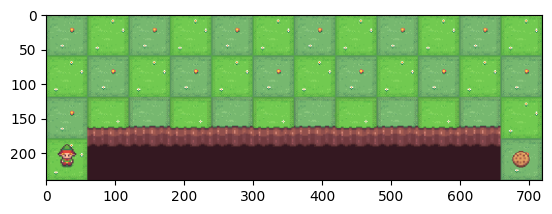

In [2]:
env = gym.make("CliffWalking-v0") 

clear_output(wait=True)
env.reset()
plt.imshow( env.render(mode='rgb_array') )
plt.show()

In [134]:
print("Number of States: %d"%env.observation_space.n)
print("Number of Actions: %d"%env.action_space.n)

Number of States: 48
Number of Actions: 4


## 1. **Monte Carlo ES (Exploring Starts)**

In [137]:
def choose_action(state):
    if np.random.uniform() < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state])
    return action

In [144]:
def generate_episode_es(policy,action, verbose=False):
  episode = []
  curr_state = env.reset()
  next_probs = policy[curr_state]
  action = np.random.choice(np.arange(len(next_probs)),p=next_probs)
  i=0
  # start_state = np.random.randint(num_states-1)
  start_state = 0
  started = False
  while True:
    if verbose:
      clear_output(wait=True)
      plt.imshow( env.render(mode='rgb_array') )
      plt.show()
      time.sleep(1)
    next_state, rew, done, _ = env.step(action)
    if i == start_state and started==False:
      started = True
    if started:
      episode.append((curr_state,action, rew))
    i +=1
    if i % 10000 == 0:
      print(len(episode))
      print(policy[next_state]) 
    
    if i==10000:
      print("Max Limited Reached")
      break

    next_probs = policy[next_state]
    next_action = np.random.choice(np.arange(len(next_probs)),p=next_probs)
    # next_action = choose_action(next_state)

    curr_state = next_state
    action = next_action

    if done:
      print("\nGoal State: %s\n"%(curr_state))
      break
  env.close()
  return episode

In [140]:
%%time
numIterations = 100
gamma = 0.99
epsilon = 0.1
num_states = env.observation_space.n
num_actions = env.action_space.n

def argmax_rand(arr):
    # break ties randomly, np.argmax() always picks first max
    return np.random.choice(np.flatnonzero(arr == np.max(arr)))

returns = defaultdict(list)
Q = defaultdict(lambda: np.zeros(num_actions))
C = defaultdict(lambda: np.zeros(num_actions))
policy = np.ones((num_states, num_actions)) / num_actions

for it in tqdm(range(numIterations)):
  action = np.random.randint(num_actions)
  episode = generate_episode_es(policy,action,verbose=False)
  print("Episode Length: %d\n" % (len(episode)))
  G = 0
  print(it)
  for t in range(len(episode)-2,-1,-1):
    s,a,r = episode[t]
    s_t,a_t,r_t = episode[t+1]
    G = gamma*G + r_t
    if (s,a) not in [(episode[i][0],episode[i][1]) for i in range(0,t)]:
      C[s][a] += 1
      returns[(s,a)].append(G)
      # Q[s][a] = np.average(returns[(s,a)])
      Q[s][a] += (G - Q[s][a])/C[s][a]
      max_a = argmax_rand([Q[s][action] for action in range(num_actions)])
      policy[s] = np.eye(num_actions)[max_a]
      # for action in range(num_actions):
      #   if action == max_a:
      #     policy[s][action] = 1 - epsilon + epsilon/num_actions
      #   else:
      #     policy[s][action] = epsilon/num_actions

  0%|          | 0/100 [00:00<?, ?it/s]

10000
[0.25 0.25 0.25 0.25]
Max Limited Reached
Episode Length: 10000

0


  1%|          | 1/100 [00:09<16:10,  9.81s/it]


Goal State: 47

Episode Length: 414

1
10000
[0. 0. 1. 0.]
Max Limited Reached
Episode Length: 10000

2


  3%|▎         | 3/100 [00:20<10:32,  6.52s/it]

10000
[1. 0. 0. 0.]
Max Limited Reached
Episode Length: 10000

3


  4%|▍         | 4/100 [00:31<12:52,  8.05s/it]


Goal State: 47

Episode Length: 2668

4


  5%|▌         | 5/100 [00:32<08:50,  5.58s/it]


Goal State: 47

Episode Length: 4570

5


  6%|▌         | 6/100 [00:34<06:54,  4.41s/it]

10000
[0. 0. 0. 1.]
Max Limited Reached
Episode Length: 10000

6


  7%|▋         | 7/100 [00:45<10:17,  6.64s/it]

10000
[0. 0. 0. 1.]
Max Limited Reached
Episode Length: 10000

7


  8%|▊         | 8/100 [00:56<12:14,  7.98s/it]

10000
[0. 0. 0. 1.]
Max Limited Reached
Episode Length: 10000

8


  9%|▉         | 9/100 [01:07<13:21,  8.81s/it]

10000
[0. 0. 0. 1.]
Max Limited Reached
Episode Length: 10000

9


 10%|█         | 10/100 [01:17<14:01,  9.35s/it]

10000
[0. 0. 0. 1.]
Max Limited Reached
Episode Length: 10000

10


 11%|█         | 11/100 [01:27<13:53,  9.37s/it]


Goal State: 47

Episode Length: 8626

11


 12%|█▏        | 12/100 [01:36<13:33,  9.25s/it]

10000
[0. 0. 0. 1.]
Max Limited Reached
Episode Length: 10000

12


 13%|█▎        | 13/100 [01:46<14:02,  9.68s/it]


Goal State: 47

Episode Length: 3754

13


 14%|█▍        | 14/100 [01:48<10:14,  7.15s/it]


Goal State: 47

Episode Length: 2454

14


 15%|█▌        | 15/100 [01:48<07:18,  5.15s/it]


Goal State: 47

Episode Length: 6681

15


 16%|█▌        | 16/100 [01:53<07:02,  5.03s/it]


Goal State: 47

Episode Length: 2454

16


 17%|█▋        | 17/100 [01:54<05:15,  3.80s/it]

10000
[0. 0. 0. 1.]
Max Limited Reached
Episode Length: 10000

17


 18%|█▊        | 18/100 [02:04<07:48,  5.72s/it]


Goal State: 47

Episode Length: 5387

18


 19%|█▉        | 19/100 [02:08<06:56,  5.14s/it]

10000
[0. 0. 0. 1.]
Max Limited Reached
Episode Length: 10000

19


 20%|██        | 20/100 [02:17<08:36,  6.45s/it]


Goal State: 47

Episode Length: 6018

20


 21%|██        | 21/100 [02:22<07:47,  5.92s/it]

10000
[0. 0. 0. 1.]
Max Limited Reached
Episode Length: 10000

21


 22%|██▏       | 22/100 [02:31<09:01,  6.94s/it]


Goal State: 47

Episode Length: 2540

22


 23%|██▎       | 23/100 [02:32<06:37,  5.16s/it]


Goal State: 47

Episode Length: 6461

23


 24%|██▍       | 24/100 [02:37<06:21,  5.02s/it]


Goal State: 47

Episode Length: 2801

24


 25%|██▌       | 25/100 [02:38<04:37,  3.71s/it]


Goal State: 47

Episode Length: 8873

25


 26%|██▌       | 26/100 [02:46<06:14,  5.07s/it]


Goal State: 47

Episode Length: 3803

26


 27%|██▋       | 27/100 [02:48<04:58,  4.09s/it]


Goal State: 47

Episode Length: 9910

27


 28%|██▊       | 28/100 [02:57<06:46,  5.64s/it]


Goal State: 47

Episode Length: 5829

28


 29%|██▉       | 29/100 [03:01<06:14,  5.27s/it]


Goal State: 47

Episode Length: 6202

29


 30%|███       | 30/100 [03:05<05:31,  4.73s/it]

10000
[0. 0. 0. 1.]
Max Limited Reached
Episode Length: 10000

30


 31%|███       | 31/100 [03:16<07:32,  6.56s/it]


Goal State: 47

Episode Length: 7454

31


 32%|███▏      | 32/100 [03:21<06:56,  6.13s/it]


Goal State: 47

Episode Length: 497

32
10000
[1. 0. 0. 0.]
Max Limited Reached
Episode Length: 10000

33


 34%|███▍      | 34/100 [03:32<06:26,  5.85s/it]

10000
[0. 0. 0. 1.]
Max Limited Reached
Episode Length: 10000

34


 35%|███▌      | 35/100 [03:43<07:39,  7.06s/it]

10000
[0. 0. 0. 1.]
Max Limited Reached
Episode Length: 10000

35


 36%|███▌      | 36/100 [03:53<08:36,  8.07s/it]


Goal State: 47

Episode Length: 6285

36


 39%|███▉      | 39/100 [03:57<03:56,  3.88s/it]


Goal State: 47

Episode Length: 342

37

Goal State: 47

Episode Length: 972

38
10000
[0. 0. 0. 1.]
Max Limited Reached
Episode Length: 10000

39


 40%|████      | 40/100 [04:08<05:32,  5.54s/it]


Goal State: 47

Episode Length: 5587

40


 41%|████      | 41/100 [04:11<04:47,  4.88s/it]

10000
[0. 0. 0. 1.]
Max Limited Reached
Episode Length: 10000

41


 42%|████▏     | 42/100 [04:22<06:13,  6.43s/it]


Goal State: 47

Episode Length: 741

42

Goal State: 47

Episode Length: 6219

43


 44%|████▍     | 44/100 [04:25<04:09,  4.46s/it]


Goal State: 47

Episode Length: 7051

44


 46%|████▌     | 46/100 [04:31<03:15,  3.62s/it]


Goal State: 47

Episode Length: 961

45

Goal State: 47

Episode Length: 4667

46


 48%|████▊     | 48/100 [04:34<02:02,  2.35s/it]


Goal State: 47

Episode Length: 1191

47

Goal State: 47

Episode Length: 8460

48


 49%|████▉     | 49/100 [04:40<03:02,  3.57s/it]


Goal State: 47

Episode Length: 4933

49


 50%|█████     | 50/100 [04:44<02:57,  3.56s/it]


Goal State: 47

Episode Length: 306

50

Goal State: 47

Episode Length: 1560

51


 57%|█████▋    | 57/100 [04:44<00:34,  1.26it/s]


Goal State: 47

Episode Length: 462

52

Goal State: 47

Episode Length: 224

53

Goal State: 47

Episode Length: 209

54

Goal State: 47

Episode Length: 272

55

Goal State: 47

Episode Length: 1168

56

Goal State: 47

Episode Length: 42

57

Goal State: 47

Episode Length: 176

58


 73%|███████▎  | 73/100 [04:44<00:05,  5.27it/s]


Goal State: 47

Episode Length: 339

59

Goal State: 47

Episode Length: 226

60

Goal State: 47

Episode Length: 90

61

Goal State: 47

Episode Length: 45

62

Goal State: 47

Episode Length: 104

63

Goal State: 47

Episode Length: 81

64

Goal State: 47

Episode Length: 115

65

Goal State: 47

Episode Length: 174

66

Goal State: 47

Episode Length: 106

67

Goal State: 47

Episode Length: 92

68

Goal State: 47

Episode Length: 310

69

Goal State: 47

Episode Length: 52

70

Goal State: 47

Episode Length: 103

71

Goal State: 47

Episode Length: 462

72

Goal State: 47

Episode Length: 89

73

Goal State: 47

Episode Length: 133

74

Goal State: 47

Episode Length: 127

75

Goal State: 47

Episode Length: 165

76


100%|██████████| 100/100 [04:45<00:00,  2.85s/it]


Goal State: 47

Episode Length: 424

77

Goal State: 47

Episode Length: 97

78

Goal State: 47

Episode Length: 198

79

Goal State: 47

Episode Length: 72

80

Goal State: 47

Episode Length: 37

81

Goal State: 47

Episode Length: 355

82

Goal State: 47

Episode Length: 114

83

Goal State: 47

Episode Length: 52

84

Goal State: 47

Episode Length: 67

85

Goal State: 47

Episode Length: 84

86

Goal State: 47

Episode Length: 74

87

Goal State: 47

Episode Length: 181

88

Goal State: 47

Episode Length: 99

89

Goal State: 47

Episode Length: 118

90

Goal State: 47

Episode Length: 60

91

Goal State: 47

Episode Length: 68

92

Goal State: 47

Episode Length: 37

93

Goal State: 47

Episode Length: 147

94

Goal State: 47

Episode Length: 197

95

Goal State: 47

Episode Length: 21

96

Goal State: 47

Episode Length: 59

97

Goal State: 47

Episode Length: 78

98

Goal State: 47

Episode Length: 216

99
CPU times: user 4min 41s, sys: 1.25 s, total: 4min 43s
Wall time: 4min 

In [142]:
final_policy_es = defaultdict(lambda: np.zeros(env.obervation_space.n))
for s in range(env.observation_space.n):
  best_action = np.argmax(Q[s])
  final_policy_es[s] = best_action
print(final_policy_es)

defaultdict(<function <lambda> at 0x7f5cd40a7e20>, {0: 3, 1: 1, 2: 2, 3: 1, 4: 1, 5: 1, 6: 2, 7: 1, 8: 1, 9: 1, 10: 2, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 2, 24: 0, 25: 2, 26: 1, 27: 0, 28: 1, 29: 0, 30: 0, 31: 3, 32: 2, 33: 0, 34: 1, 35: 2, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0})


In [132]:
def play_episode(policy, verbose=False):
  curr_state = env.reset()
  action = policy[curr_state]
  total_reward = 0;

  while True:
    if verbose:
      clear_output(wait=True)
      plt.imshow( env.render(mode='rgb_array') )
      plt.show()
      time.sleep(1)
    next_state, rew, done, _ = env.step(action)
    # episode.append((curr_state,action, rew))
    total_reward += rew
    next_action = policy[next_state]
    print(next_state,next_action)

    curr_state = next_state
    action = next_action

    if done:
      break
  return total_reward

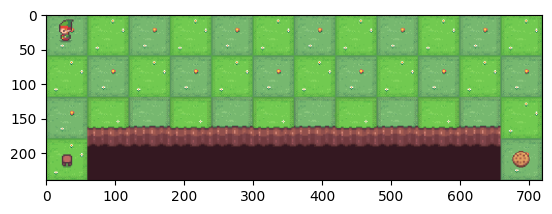

KeyboardInterrupt: ignored

In [143]:
# from gym import wrappers
env = gym.make("CliffWalking-v0") 
# env = wrappers.RecordVideo(env, "./gym-results")
play_episode(final_policy_es,verbose=True)
env.close()

This policy is not optimal, hence the agent got stuck in one state.

In [141]:
env = gym.make('CliffWalking-v0')
num_episodes = 50
gamma = 0.99
epsilon = 0.1

Q = np.zeros((env.observation_space.n, env.action_space.n))
returns = {}

def choose_action(state):
    if np.random.uniform() < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state])
    return action

steps_es = []
rewards_es=[]
for i in range(num_episodes):
    print("Episode: ",i)
    episode_states = []
    episode_actions = []
    episode_rewards = []
    state = env.reset()
    done = False

    action = env.action_space.sample()

    while not done:
        episode_states.append(state)
        episode_actions.append(action)
        state, reward, done, _ = env.step(action)
        episode_rewards.append(reward)

        # Choose next action using epsilon-greedy policy
        action = choose_action(state)
    G = 0
    for t in range(len(episode_states)-1, -1, -1):
        s = episode_states[t]
        a = episode_actions[t]
        r = episode_rewards[t]
        G = gamma * G + r
        if (s, a) not in episode_states[:t]:
            if (s, a) not in returns:
                returns[(s, a)] = []
            returns[(s, a)].append(G)
            Q[s][a] = np.mean(returns[(s, a)])

    # Calculate steps
    steps_es.append(len(episode_states))
    rewards_es.append(sum(episode_rewards))

# Print results
print(f"Monte Carlo ES: average steps = {np.mean(steps_es)},\t average rewards = {np.mean(rewards_es)}")

## 2. **On-policy first-visit MC control (for Ɛ-soft policies),for Ɛ= 0.1**

In [ ]:
env = gym.make("CliffWalking-v0") 

In [ ]:
def generate_episode(policy, verbose=False):
  episode = []
  curr_state = env.reset()
  next_probs = policy[curr_state]
  action = np.random.choice(np.arange(len(next_probs)),p=next_probs)
  i=0
  while True:
    if verbose:
      clear_output(wait=True)
      plt.imshow( env.render(mode='rgb_array') )
      plt.show()
    next_state, rew, done, _ = env.step(action)
    episode.append((curr_state,action, rew))
    i +=1
    if i % 10000 == 0:
      print(len(episode)) 

    next_probs = policy[next_state]
    next_action = np.random.choice(np.arange(len(next_probs)),p=next_probs)
    # print(next_action,next_state)
    curr_state = next_state
    action = next_action

    if done:
      print("\nGoal State: %s\n"%(curr_state))
      break
  env.close()
  return episode

In [ ]:
%%time
numIterations = 500
gamma = 0.99
epsilon = 0.1
num_states = env.observation_space.n
num_actions = env.action_space.n

def argmax_rand(arr):
    # break ties randomly, np.argmax() always picks first max
    return np.random.choice(np.flatnonzero(arr == np.max(arr)))

returns = defaultdict(list)
Q = defaultdict(lambda: np.zeros(num_actions))
policy = np.ones((num_states, num_actions)) / num_actions

for it in tqdm(range(numIterations)):
  episode = generate_episode(policy,verbose=False)
  print("Episode Length: %d\n" % (len(episode)))
  G = 0
  for t in range(len(episode)-2,-1,-1):
    s,a,r = episode[t]
    s_t,a_t,r_t = episode[t+1]
    G = gamma*G + r_t
    if (s,a) not in [(episode[i][0],episode[i][1]) for i in range(0,t)]:
      returns[(s,a)].append(G)
      Q[s][a] = np.average(returns[(s,a)])
      max_a = argmax_rand([Q[s][a] for a in range(num_actions)])
      for action in range(num_actions):
        if action == max_a:
          policy[s][action] = 1 - epsilon + epsilon/num_actions
        else:
          policy[s][action] = epsilon/num_actions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
  0%|          | 1/500 [00:00<02:24,  3.45it/s]


Goal State: 47


Start State: 0	
Episode Length: 1414


Goal State: 47


Start State: 0	
Episode Length: 2852



  0%|          | 2/500 [00:01<05:21,  1.55it/s]


Goal State: 47


Start State: 0	
Episode Length: 5173



  1%|          | 4/500 [00:04<10:32,  1.28s/it]


Goal State: 47


Start State: 0	
Episode Length: 725


Goal State: 47


Start State: 0	
Episode Length: 728



  1%|▏         | 7/500 [00:05<03:55,  2.09it/s]


Goal State: 47


Start State: 0	
Episode Length: 238


Goal State: 47


Start State: 0	
Episode Length: 663



  2%|▏         | 9/500 [00:05<02:29,  3.29it/s]


Goal State: 47


Start State: 0	
Episode Length: 465


Goal State: 47


Start State: 0	
Episode Length: 205


Goal State: 47


Start State: 0	
Episode Length: 136


Goal State: 47


Start State: 0	
Episode Length: 176


Goal State: 47


Start State: 0	
Episode Length: 328


Goal State: 47


Start State: 0	
Episode Length: 254



  3%|▎         | 15/500 [00:05<01:06,  7.35it/s]


Goal State: 47


Start State: 0	
Episode Length: 239


Goal State: 47


Start State: 0	
Episode Length: 309


Goal State: 47


Start State: 0	
Episode Length: 182


Goal State: 47


Start State: 0	
Episode Length: 65


Goal State: 47


Start State: 0	
Episode Length: 65



  5%|▌         | 25/500 [00:05<00:27, 17.39it/s]


Goal State: 47


Start State: 0	
Episode Length: 350


Goal State: 47


Start State: 0	
Episode Length: 57


Goal State: 47


Start State: 0	
Episode Length: 63


Goal State: 47


Start State: 0	
Episode Length: 72


Goal State: 47


Start State: 0	
Episode Length: 93


Goal State: 47


Start State: 0	
Episode Length: 119


Goal State: 47


Start State: 0	
Episode Length: 88


Goal State: 47


Start State: 0	
Episode Length: 35


Goal State: 47


Start State: 0	
Episode Length: 42



  7%|▋         | 34/500 [00:06<00:17, 26.50it/s]


Goal State: 47


Start State: 0	
Episode Length: 248


Goal State: 47


Start State: 0	
Episode Length: 72


Goal State: 47


Start State: 0	
Episode Length: 66


Goal State: 47


Start State: 0	
Episode Length: 94


Goal State: 47


Start State: 0	
Episode Length: 28


Goal State: 47


Start State: 0	
Episode Length: 255


Goal State: 47


Start State: 0	
Episode Length: 36


Goal State: 47


Start State: 0	
Episode Length: 134


Goal State: 47


Start State: 0	
Episode Length: 121


Goal State: 47


Start State: 0	
Episode Length: 191



  8%|▊         | 42/500 [00:06<00:17, 26.73it/s]


Goal State: 47


Start State: 0	
Episode Length: 413


Goal State: 47


Start State: 0	
Episode Length: 81


Goal State: 47


Start State: 0	
Episode Length: 89


Goal State: 47


Start State: 0	
Episode Length: 83


Goal State: 47


Start State: 0	
Episode Length: 80


Goal State: 47


Start State: 0	
Episode Length: 84



 10%|█         | 52/500 [00:06<00:12, 34.78it/s]


Goal State: 47


Start State: 0	
Episode Length: 102


Goal State: 47


Start State: 0	
Episode Length: 158


Goal State: 47


Start State: 0	
Episode Length: 57


Goal State: 47


Start State: 0	
Episode Length: 22


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 25


Goal State: 47


Start State: 0	
Episode Length: 27


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 23


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 20



 13%|█▎        | 67/500 [00:06<00:08, 50.47it/s]


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 31


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 28


Goal State: 47


Start State: 0	
Episode Length: 95


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 42


Goal State: 47


Start State: 0	
Episode Length: 24


Goal State: 47


Start State: 0	
Episode Length: 68


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 35


Goal State: 47


Start State: 0	
Episode Length: 46


Goal State: 47


Start State: 0	
Episode Length: 17


Goal State: 47


Start State: 0	

 19%|█▉        | 97/500 [00:07<00:04, 94.48it/s]


Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 17


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 42


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 25


Goal State: 47


Start State: 0	
Episode Length: 44


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 23


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 23


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 25


Goal State: 47


Start State: 0	
Episode Length: 23


Goal S

 26%|██▌       | 128/500 [00:07<00:03, 121.27it/s]


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 22


Goal State: 47


Start State: 0	
Episode Length: 17


Goal State: 47


Start State: 0	
Episode Length: 23


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 24


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 24


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 17


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 17


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start Stat

 32%|███▏      | 159/500 [00:07<00:02, 137.11it/s]


Goal State: 47


Start State: 0	
Episode Length: 25


Goal State: 47


Start State: 0	
Episode Length: 23


Goal State: 47


Start State: 0	
Episode Length: 23


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 22


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 25


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 25


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 25


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 22


Goal State: 47


Start State: 0	
Episode Length: 23


Goal State: 47


Start State: 0	
Episode Length: 25


Goal State: 47


Start State: 0	
Episode Length: 18


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start Stat

 37%|███▋      | 187/500 [00:07<00:02, 134.03it/s]


Start State: 0	
Episode Length: 24


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 24


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 23


Goal State: 47


Start State: 0	
Episode Length: 23


Goal State: 47


Start State: 0	
Episode Length: 22


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 29


Goal State: 47


Start State: 0	
Episode Length: 25


Goal State: 47


Start State: 0	
Episode Length: 22


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 23


Goal State: 47


Start State: 0	
Episode Length: 26


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 24


Goal State: 47


Start State: 0	
Episode Len

 40%|████      | 201/500 [00:07<00:02, 134.21it/s]


Goal State: 47


Start State: 0	
Episode Length: 17


Goal State: 47


Start State: 0	
Episode Length: 24


Goal State: 47


Start State: 0	
Episode Length: 23


Goal State: 47


Start State: 0	
Episode Length: 25


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 23


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 59


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 25


Goal State: 47


Start State: 0	
Episode Length: 24


Goal State: 47


Start State: 0	
Episode Length: 25


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 22


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 39


Goal State: 47


Start Stat

 46%|████▌     | 228/500 [00:08<00:02, 125.42it/s]


Goal State: 47


Start State: 0	
Episode Length: 22


Goal State: 47


Start State: 0	
Episode Length: 23


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 26


Goal State: 47


Start State: 0	
Episode Length: 25


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 116


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start Sta

 52%|█████▏    | 258/500 [00:08<00:01, 133.64it/s]


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 66


Goal State: 47


Start State: 0	
Episode Length: 46


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 28


Goal State: 47


Start State: 0	
Episode Length: 56


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start Stat

 57%|█████▋    | 286/500 [00:08<00:01, 129.77it/s]


Goal State: 47


Start State: 0	
Episode Length: 24


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 24


Goal State: 47


Start State: 0	
Episode Length: 24


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 24


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 23


Goal State: 47


Start State: 0	
Episode Length: 121


Goal State: 47


Start State: 0	
Episode Length: 22


Goal State: 47


Start State: 0	
Episode Length: 42


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start Sta

 63%|██████▎   | 316/500 [00:08<00:01, 134.82it/s]


Goal State: 47


Start State: 0	
Episode Length: 22


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 35


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 45


Goal State: 47


Start State: 0	
Episode Length: 23


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 51


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 22


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start Stat

 69%|██████▉   | 345/500 [00:09<00:01, 135.74it/s]


Goal State: 47


Start State: 0	
Episode Length: 25


Goal State: 47


Start State: 0	
Episode Length: 25


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 106


Goal State: 47


Start State: 0	
Episode Length: 18


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 23


Goal State: 47


Start State: 0	
Episode Length: 24


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 23


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start Sta

 75%|███████▍  | 374/500 [00:09<00:00, 138.48it/s]


Goal State: 47


Start State: 0	
Episode Length: 22


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 23


Goal State: 47


Start State: 0	
Episode Length: 22


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 17


Goal State: 47


Start State: 0	
Episode Length: 22


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 25


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start Stat

 81%|████████  | 405/500 [00:09<00:00, 143.83it/s]


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 24


Goal State: 47


Start State: 0	
Episode Length: 23


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 23


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 26


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 23


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 23


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 24


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start Stat

 87%|████████▋ | 435/500 [00:09<00:00, 144.01it/s]


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 17


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 17


Goal State: 47


Start State: 0	
Episode Length: 17


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 25


Goal State: 47


Start State: 0	
Episode Length: 22


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 22


Goal State: 47


Start State: 0	
Episode Length: 22


Goal State: 47


Start State: 0	
Episode Length: 26


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 24


Goal State: 47


Start Stat

 93%|█████████▎| 464/500 [00:09<00:00, 131.31it/s]


Goal State: 47


Start State: 0	
Episode Length: 25


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 23


Goal State: 47


Start State: 0	
Episode Length: 25


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 22


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 23


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 26


Goal State: 47


Start State: 0	
Episode Length: 24


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 22


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 24


Goal State: 47


Start Stat

 98%|█████████▊| 492/500 [00:10<00:00, 129.14it/s]


Goal State: 47


Start State: 0	
Episode Length: 22


Goal State: 47


Start State: 0	
Episode Length: 26


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 38


Goal State: 47


Start State: 0	
Episode Length: 28


Goal State: 47


Start State: 0	
Episode Length: 21


Goal State: 47


Start State: 0	
Episode Length: 17


Goal State: 47


Start State: 0	
Episode Length: 23


Goal State: 47


Start State: 0	
Episode Length: 24


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 22


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start Stat

100%|██████████| 500/500 [00:10<00:00, 49.17it/s] 


Goal State: 47


Start State: 0	
Episode Length: 22


Goal State: 47


Start State: 0	
Episode Length: 19


Goal State: 47


Start State: 0	
Episode Length: 20


Goal State: 47


Start State: 0	
Episode Length: 23

CPU times: user 8.95 s, sys: 243 ms, total: 9.2 s
Wall time: 10.2 s


In [ ]:
# Finalizing the policy by finding action with maximum Q value for every state
final_policy = defaultdict(lambda: np.zeros(env.obervation_space.n))
for s in range(env.observation_space.n):
  best_action = np.argmax(Q[s])
  final_policy[s] = best_action

In [17]:
def play_episode(policy, verbose=False):
  curr_state = env.reset()
  action = policy[curr_state]
  total_reward = 0;

  while True:
    if verbose:
      clear_output(wait=True)
      plt.imshow( env.render(mode='rgb_array') )
      plt.show()
      time.sleep(1)
    next_state, rew, done, _ = env.step(action)
    # episode.append((curr_state,action, rew))
    total_reward += rew
    next_action = policy[next_state]
    print(next_state,next_action)

    curr_state = next_state
    action = next_action

    if done:
      break
  return total_reward

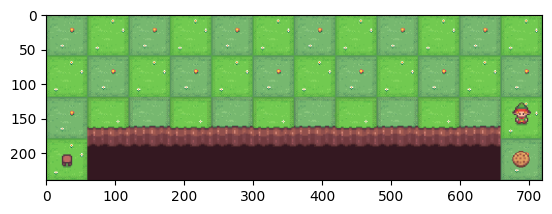

47 0


-19

In [ ]:
from gym import wrappers
env = gym.make("CliffWalking-v0") 
env = wrappers.RecordVideo(env, "./gym-results")
play_episode(final_policy,verbose=True)
env.close()

In [ ]:
import io
import base64
from IPython.display import HTML

def ipython_show_video(path):
    """Show a video at `path` within IPython Notebook
    """
    if not os.path.isfile(path):
        raise NameError("Cannot access: {}".format(path))

    video = io.open(path, 'r+b').read()
    encoded = base64.b64encode(video)

    display(HTML(
        data="""
        <video alt="test" controls>
        <source src="data:video/mp4;base64,{0}" type="video/mp4" />
        </video>
        """.format(encoded.decode('ascii'))
    ))
ipython_show_video('/content/gym-results/rl-video-episode-0.mp4')

In [ ]:
print("The Optimal Policy Obtained is: ")
print(final_policy)

The Optimal Policy Obtained is: 
defaultdict(<function <lambda> at 0x7f83dfaed5a0>, {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 2, 8: 1, 9: 2, 10: 2, 11: 3, 12: 0, 13: 3, 14: 1, 15: 0, 16: 2, 17: 1, 18: 1, 19: 1, 20: 0, 21: 1, 22: 1, 23: 2, 24: 0, 25: 2, 26: 2, 27: 1, 28: 1, 29: 1, 30: 0, 31: 0, 32: 1, 33: 1, 34: 1, 35: 2, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0})


## Code to save and store policy --ignore

In [ ]:
def save_dict_to_file(dic,name):
    f = open(name+'.txt','w')
    f.write(str(dic))
    f.close()

In [ ]:
save_dict_to_file(Q,'Q_values')

In [ ]:
def load_dict_from_file(name):
    f = open(name+'.txt','r')
    data=f.read()
    f.close()
    return eval(data)

In [ ]:
# saved_policy = load_dict_from_file('final_policy')

## Compare  and  comment  on  the  performance  of  both  methods  in  terms  of  number  of  steps needed to learn optimal policy and the number of episodes

<h3><b>1. Monte Carlo ES</b></h3>
<ul>
<li>In this approach we select any state and action at random and generate a sequence but it is not possible using gym environment since it doesn't allow us to initialize a starting state of an environment.
Therefore I tried skipping a few random number of steps while generating the episode, but it had no great impact on the output.
</li>Here we are setting the probablity of action for a state with maximum Q value(Q-Value) as 1 and for remaining actions we set it to 0. Hence the policy is updated in such a way that probability of taking correct action of some state is low which causes the algorithm to take suboptimal actions i.e, it will never reach terminal state</li>
<li>I tried putting an upper limit on episode length to 10000 and Also tried to terminate the episode if the agent falls off the cliff, but still it was unable to learn the optimal policy</li>
<li>It may take a much more time compared to On-policy first-visit MC control to learn the optimal Policy</li>
</ul>

<h3><b>2. On-policy first-visit MC control</b></h3>
<ul><li>It takes around 50 episodes using this method to find an optimal Policy</li>
<li>This approach is faster than using Exploring Starts</li>
<li>It doesn't get stuck in a local maxima</li>
</ul>